### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema (probar al menos 2 diferentes)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [2]:
# Imports 

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import math
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
df.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [5]:
df = df[df["clase"] != 1]
df.clase.value_counts()

0    86
2    44
Name: clase, dtype: int64

In [6]:
# Independent variable
X = np.array(df.drop(["clase"], axis = 1))

# Dependent variable
y = np.array(df["clase"])

# Model
model = linear_model.LogisticRegression(max_iter = 150)

# Training
model.fit(X, y)

LogisticRegression(max_iter=150)

In [7]:
score = model.score(X, y)
mse = mean_squared_error(y, model.predict(X))

print(f"score: {score}\nmse: {mse}")

score: 0.9538461538461539
mse: 0.18461538461538463


El modelo es tiene un mejor score y esto tiene sentido porque al tener menos posibles outcomes, la probabilidad de que el modelo acierte también es mayor:
- 2 posibles outcomes = 50 / 50
- 3 posibles outcomes = 33 / 33 / 33

### LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema (probar al menos 2 diferentes)

In [75]:
def to_test(penalty, intercept):
    # Independent variable
    X2 = np.array(df2.drop(["clase"], axis = 1))

    # Dependent variable
    y2 = np.array(df2["clase"])

    # Parameters to iterate over
    seeds = random.sample(range(1, 10000), 4)
    iterations = list(range(50, 350, 50))

    d = {}
    d2 = {}

    # Let's try with different seeds and number of iterations
    for seed in seeds:
        for iteration in iterations:
            # Model
            model2 = linear_model.LogisticRegression(penalty = penalty, fit_intercept = intercept, random_state = seed, max_iter = iteration, n_jobs = -1)

            # Training
            model2.fit(X2, y2)

            # Score and MSE
            score2 = model2.score(X2, y2)
            mse2 = mean_squared_error(y2, model2.predict(X2))
            d2[iteration] = {"score": score2, "mse" : mse2}


        d[seed] = d2

    # I'll transform the dict into a dataframe
    scores = pd.DataFrame(d).stack().reset_index()
    scores.columns = ["iterations", "seeds", "results"]
    scores["score"] = scores["results"].apply(lambda x: x["score"])
    scores["mse"] = scores["results"].apply(lambda x: x["mse"])

    return scores

In [83]:
def plot(scores, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharex = True)

    sns.scatterplot(x = scores["seeds"], y = scores["score"], hue = scores["iterations"], ax = ax1)
    sns.scatterplot(x = scores["seeds"], y = scores["mse"], hue = scores["iterations"], ax = ax2)

    fig.suptitle(title)

    ax1.set_title("Score")
    ax2.set_title("MSE")

    return fig

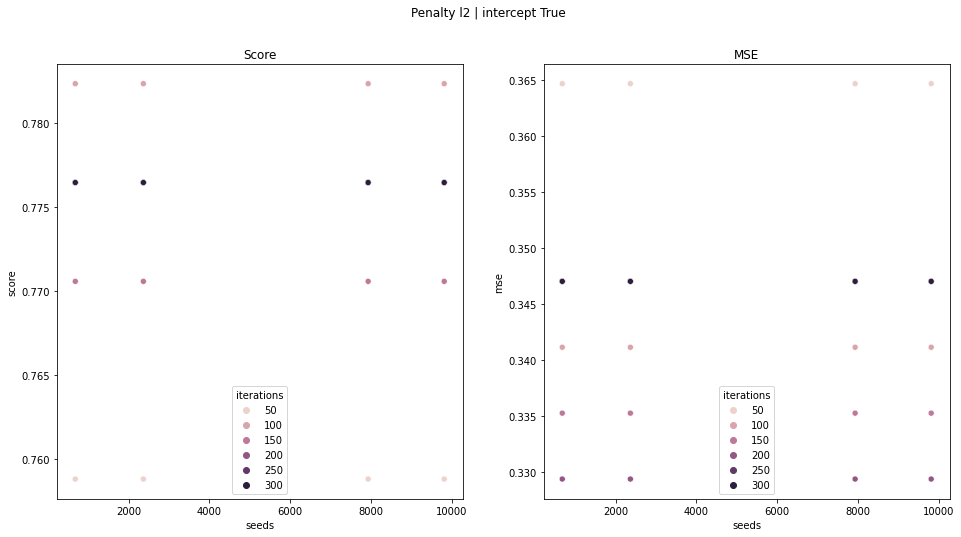

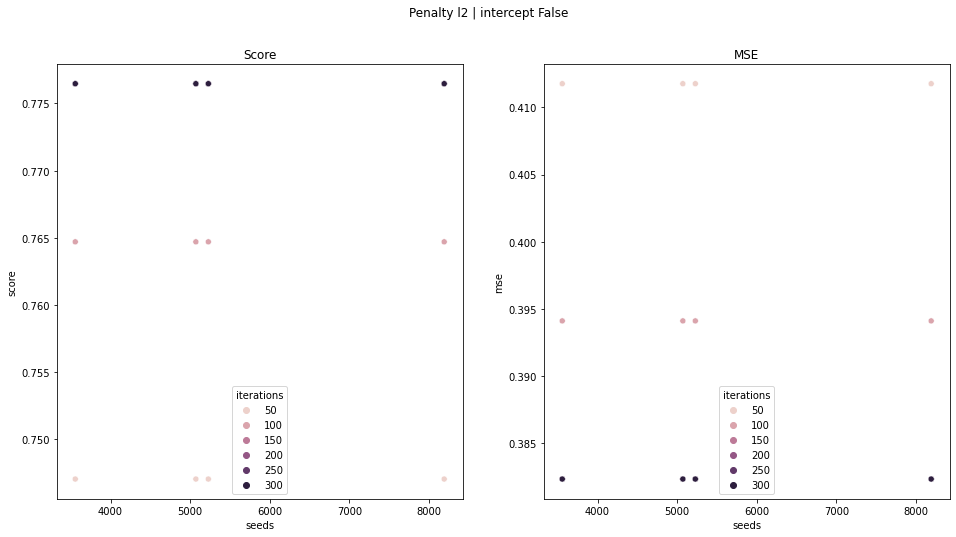

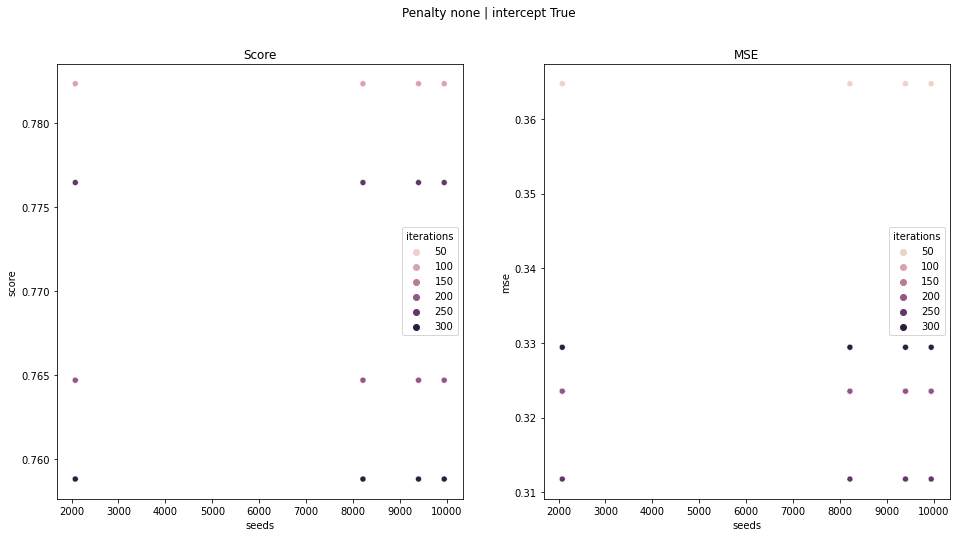

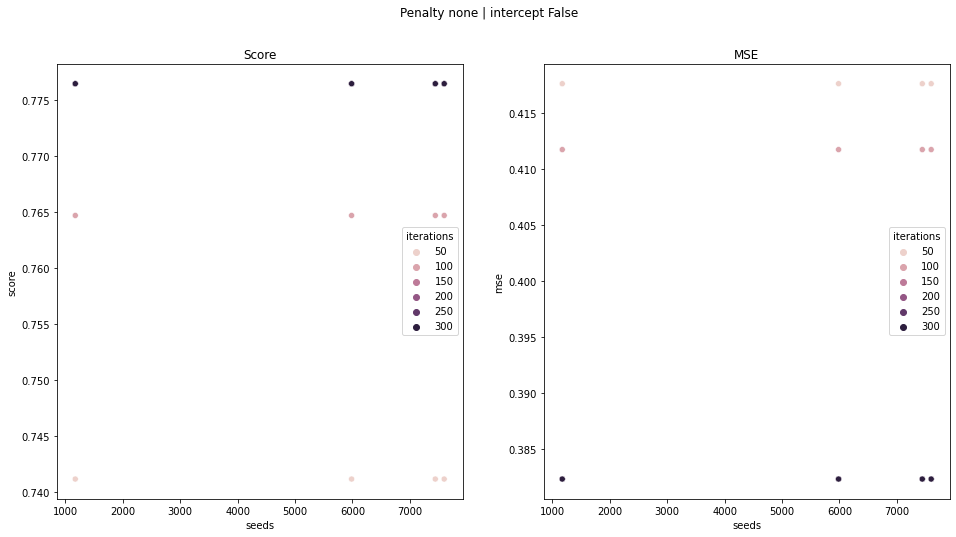

In [84]:
penalties = ["l2", "none"]
inter= [True, False]

for penalty in penalties:
    for inter in intercept:
        scores = to_test(penalty, inter)
        plot(scores, f"Penalty {penalty} | intercept {inter}")
        plt.show()

Podemos comprobar lo siguiente para estos datos:
- Intercept mejora el score y reduce el mse
- A más iteraciones, mejor score
- La semilla no tiene impacto ninguno
- El penalty no tiene impacto en este caso